In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [2]:
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# 1. Изучение данных

In [4]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [8]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [9]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [11]:
# для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем, где у нас трейн
df_test['sample'] = 0 # помечаем, где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

<AxesSubplot:>

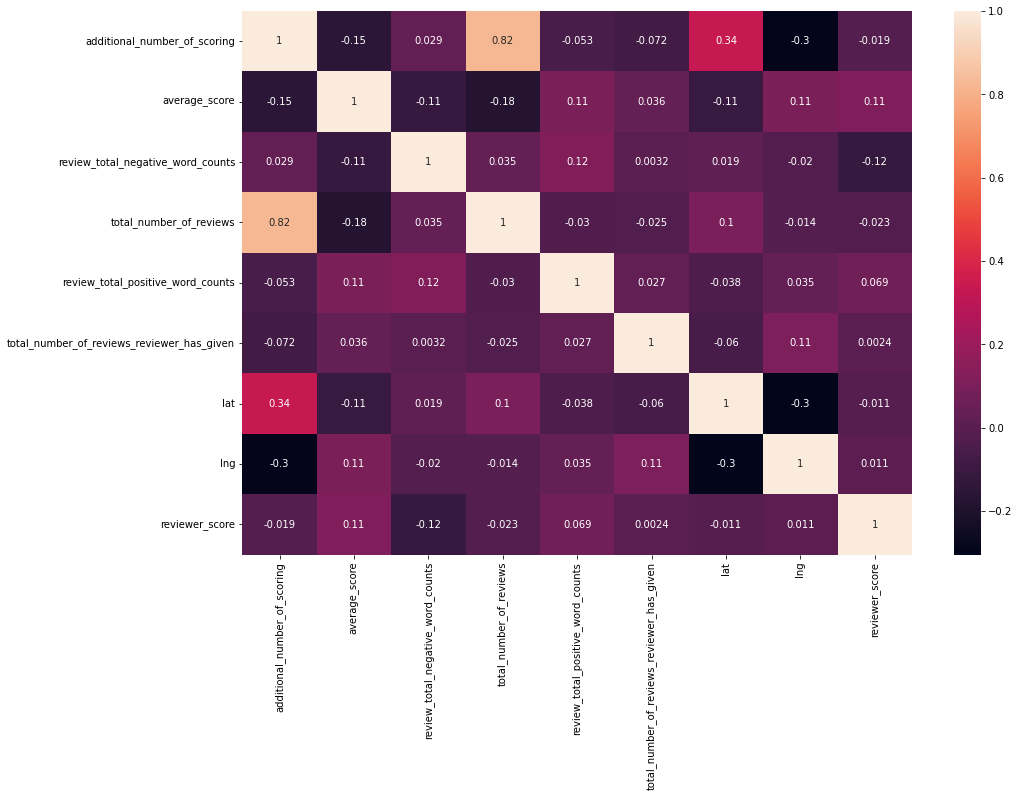

In [13]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

# 2. Проектирование признаков

**В признаках lat и lng есть пропуски. Заполним их через выделение города из признака hotel_address. Впоследствии можно будет удалить город и адрес, поскольку по сути они будут дублировать информацию из координат.**

In [14]:
data['hotel_address'].value_counts()

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
8 rue Fr d ric Bastiat 8th arr 75008 Paris France                                   12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: hotel_address, Length: 1493, dtype: i

**Мы видим, что город находится на предпоследнем месте в адресе, кроме случаев, когда страной является United Kingdom**

In [15]:
data['hotel_city'] = data['hotel_address'].apply(lambda x: x.split()[-5] if x.split()[-1] == 'Kingdom' else x.split()[-2])
data['hotel_city'].value_counts()

London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: hotel_city, dtype: int64

**Заполним пропуски в координатах медианой среди координат отеля в одном городе**

In [16]:
data.lat = data.groupby(['hotel_city']).lat.apply(lambda x: x.fillna(x.median()))
data.lng = data.groupby(['hotel_city']).lng.apply(lambda x: x.fillna(x.median()))

**Выделим месяц и год написания отзыва**

In [17]:
data['review_date'] = pd.to_datetime(data['review_date'])
data['review_year'] = data['review_date'].dt.year
data['review_month'] = data['review_date'].dt.month

**Избавимся от слов day/days в признаке days_since_review**

In [18]:
data['days_since_review'] = data['days_since_review'].apply(lambda x: x.split()[0]).astype('int')

# 3. Отбор признаков

<AxesSubplot:>

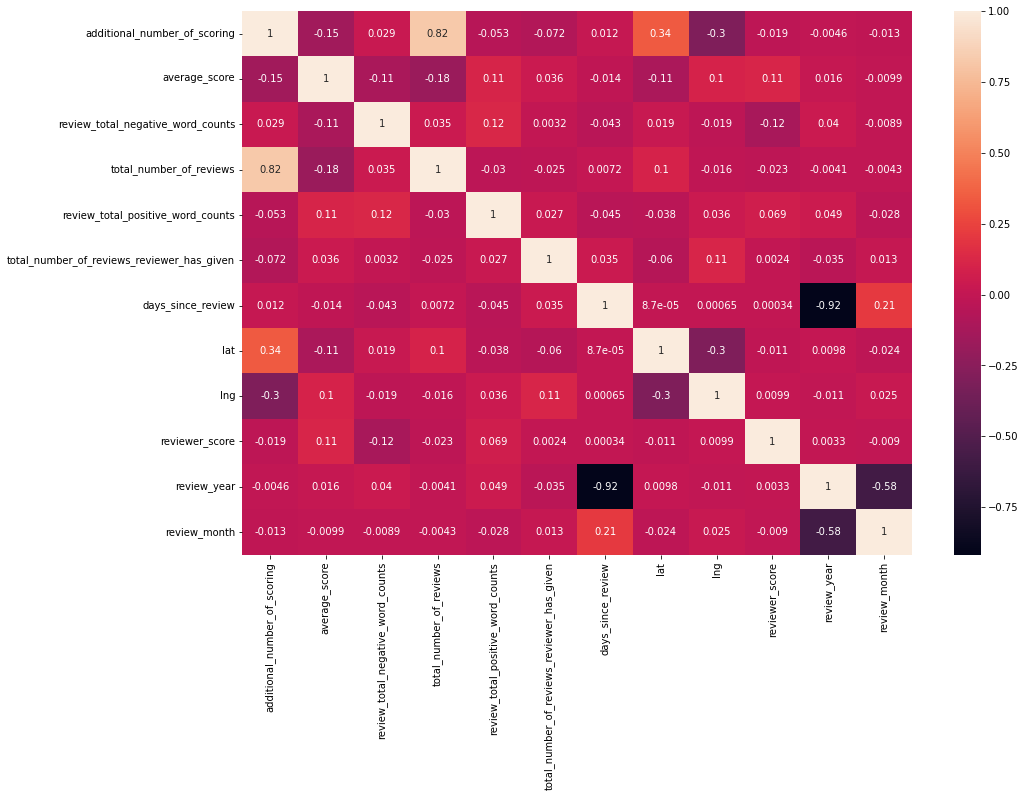

In [19]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

**Видна высокая корреляция между days_since_review и review_year. Первый признак является более информативным, поэтому удалим второй. Также удалим review_date, вряд ли получится извлечь из него еще какую-то информацию, кроме месяца**

In [20]:
data = data.drop(['review_year', 'review_date'], axis=1)

# 4. Проектирование признаков. Часть 2

**Создадим новые признаки с помощью самых популярных тегов**

In [21]:
def rev_func(tags):
    tags = tags[2:-2].strip().split(' \', \' ')
    return tags
data['tags'] = data['tags'].apply(rev_func)
data1 = data.explode('tags')
data1['tags'].value_counts()

Leisure trip                                417778
Submitted from a mobile device              307640
Couple                                      252294
Stayed 1 night                              193645
Stayed 2 nights                             133937
                                             ...  
Duplex King Suite 3 Adults                       1
Suite Free Executive Lounge Access               1
Suite with Executive Lounge Access               1
Family Room three bedrooms communicating         1
Quadruple Room 2 Adults 2 Children               1
Name: tags, Length: 2428, dtype: int64

In [22]:
tags_top = data1['tags'].value_counts()[:15]
tags_counts = pd.DataFrame(tags_top).reset_index()
tags_counts.columns = ['top_tags', 'counts_top_tags']

In [23]:
for tag in tags_counts['top_tags']:
    tag_name = str(tag)
    data[tag_name] =  data['tags'].apply(lambda x: 1 if tag_name in x else 0)

**Создадим числовые оценки оставленных позитивных и негативных отзывов, чтобы потом можно было удалить текстовые отзывы перед созданием модели**

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer()

data['neg_review_analysis'] = data['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x))
data['pos_review_analysis'] = data['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x))

data['neg_rev_neg_score'] = data['neg_review_analysis'].apply(lambda x: x['neg'])
data['pos_rev_neg_score'] = data['pos_review_analysis'].apply(lambda x: x['neg'])
data['neg_rev_neu_score'] = data['neg_review_analysis'].apply(lambda x: x['neu'])
data['pos_rev_neu_score'] = data['pos_review_analysis'].apply(lambda x: x['neu'])
data['neg_rev_pos_score'] = data['neg_review_analysis'].apply(lambda x: x['pos'])
data['pos_rev_pos_score'] = data['pos_review_analysis'].apply(lambda x: x['pos'])
data['neg_rev_compound_score'] = data['neg_review_analysis'].apply(lambda x: x['compound'])
data['pos_rev_compound_score'] = data['pos_review_analysis'].apply(lambda x: x['compound'])

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


# 5. Кодирование признаков

**Закодируем признак национальности пользователя, оставившего отзыв**

In [25]:
data['reviewer_nationality'].nunique()

227

In [26]:
import category_encoders as ce
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality'])
nationality_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, nationality_bin], axis=1)

data.head()

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,...,neg_rev_compound_score,pos_rev_compound_score,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
0,Via Senigallia 6 20161 Milan Italy,904,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,...,-0.0554,0.9615,0,0,0,0,0,0,0,1
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,...,-0.2960,0.3400,0,0,0,0,0,0,1,0
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,...,0.0000,0.6908,0,0,0,0,0,0,1,1
3,Piazza Della Repubblica 17 Central Station 201...,241,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,...,-0.7096,0.9153,0,0,0,0,0,1,0,0
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,...,-0.7096,0.7717,0,0,0,0,0,0,0,1


# 6. Построение модели

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 52 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   average_score                               515738 non-null  float64
 3   hotel_name                                  515738 non-null  object 
 4   reviewer_nationality                        515738 non-null  object 
 5   negative_review                             515738 non-null  object 
 6   review_total_negative_word_counts           515738 non-null  int64  
 7   total_number_of_reviews                     515738 non-null  int64  
 8   positive_review                             515738 non-null  object 
 9   review_total_positive_word_counts           515738 non-null  int64  
 

In [28]:
# модель на признаках с dtypes "object" обучаться не будет, просто выберем их и удалим
drop_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(drop_columns, axis = 1, inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 43 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   days_since_review                           515738 non-null  int64  
 7   lat                                         515738 non-null  float64
 8   lng                                         515738 non-null  float64
 9   sample                                      515738 non-null  int64  
 

In [30]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [31]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape, X_train_scaled.shape, X_test_scaled.shape

((128935, 42),
 (386803, 42),
 (386803, 41),
 (309442, 41),
 (77361, 41),
 (309442, 41),
 (77361, 41))

In [33]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [34]:
# Создаём модель
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
model_scaled = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [35]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)
model_scaled.fit(X_train_scaled, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
y_pred = model.predict(X_test)
y_pred_scaled = model_scaled.predict(X_test_scaled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.2s finished


In [36]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.8767573814109603


In [37]:
print('MAE (scaled):', metrics.mean_absolute_error(y_test, y_pred_scaled))

MAE (scaled): 0.8765976178780863


In [38]:
def mape_func(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
print('MAPE:', mape_func(y_test, y_pred))

MAPE: 12.51261882799104


In [39]:
print('MAPE (scaled):', mape_func(y_test, y_pred_scaled))

MAPE (scaled): 12.509255113362682


**Вывод: нормализация признаков не дает улучшения метрик**

<AxesSubplot:>

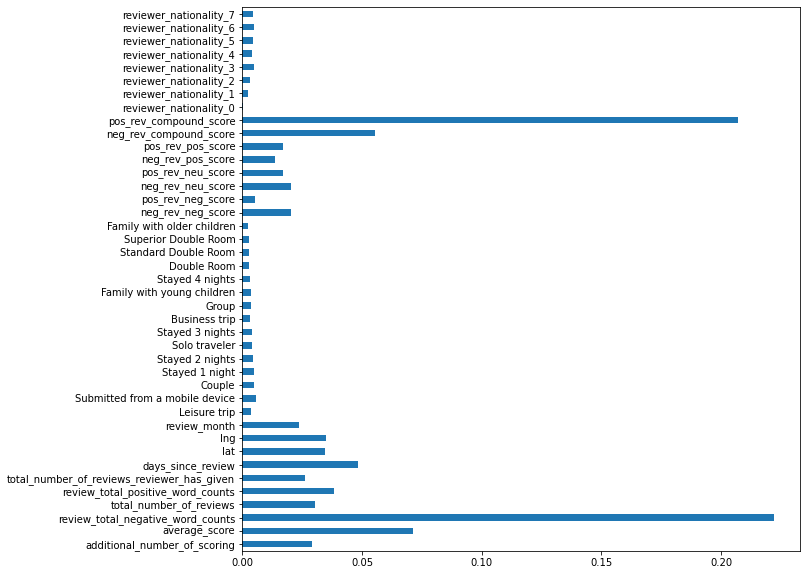

In [40]:
# выводим самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

In [41]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,reviewer_score,...,neg_rev_compound_score,pos_rev_compound_score,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
123293,806,7.8,0,3117,3,1,352,51.510574,-0.150995,0.0,...,-0.7096,0.0000,0,0,0,0,1,1,1,0
108007,431,7.9,90,1532,2,1,130,51.506024,-0.151078,0.0,...,-0.6486,0.0000,0,0,0,0,0,0,0,1
86963,728,8.9,28,3168,2,2,78,51.528677,-0.128349,0.0,...,-0.5437,0.0000,0,0,0,0,0,0,0,1
81854,272,8.1,116,1652,68,1,29,48.876920,2.306913,0.0,...,-0.2530,0.9277,0,0,0,0,0,1,1,0
17099,105,8.0,2,1607,17,5,378,45.448188,9.257046,0.0,...,0.0000,-0.5849,0,0,0,1,0,1,0,0
97258,20,7.0,54,374,29,2,518,48.836420,2.360333,0.0,...,-0.7290,0.9100,0,0,0,0,0,0,0,1
57828,666,8.5,22,4559,9,1,375,41.371308,2.181698,0.0,...,0.0942,0.8316,0,0,0,1,1,0,1,1
113880,311,8.3,0,3720,7,20,329,45.461177,9.191047,0.0,...,-0.7096,0.0000,0,0,0,0,1,0,0,0
76090,391,8.6,0,2685,19,1,401,51.490105,-0.138135,0.0,...,-0.7096,0.8225,0,0,0,0,0,0,0,1
25901,249,7.7,14,1573,6,1,413,51.490749,-0.193463,0.0,...,-0.5574,0.5267,0,0,0,0,0,0,0,1


In [42]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [43]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [44]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.8s finished


In [45]:
predict_submission

array([8.462, 7.227, 8.464, ..., 8.327, 9.538, 7.405])

In [46]:
list(sample_submission)

['reviewer_score', 'id']

In [47]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.462,488440
1,7.227,274649
2,8.464,374688
3,9.731,404352
4,9.665,451596
5,9.028,302161
6,7.675,317079
7,7.525,13963
8,8.517,159785
9,7.474,195089
